In [8]:
## Cheat Method

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import gamma

# forcing nano scale
from matplotlib.ticker import ScalarFormatter
nano_formatter = ScalarFormatter(useMathText=True)
nano_formatter.set_powerlimits((-9, -9))  # Force e-9

# manually plotting prediction rings
from matplotlib.patches import Circle

# TrackPy stuff
import trackpy as tp
import pims

import cv2


# localization error 
sigma_loc = 100e-9

#returns pos_noisy of same shape with Gaussian noise.
def add_localization_error(pos, sigma):
    noise = np.random.normal(0, sigma, size=pos.shape)
    return pos + noise

def nano(num):
    return num * 10**(-9)

def stokes_einstein(r, t, T_Kelvin, eta):
    # Boltzmann's constant
    k_B = 1.38e-23

    # Calculate diffusion coefficient using Stokes-Einstein relation
    D = (k_B * T_Kelvin) / (6 * np.pi * eta * r)
    
    return D

In [10]:
# from test data
t = 0.1 #100 ms
T_Celsius = 23.4
T_Kelvin = T_Celsius + 273.15 #C to Kelvin
eta = 9.2e-4

num_particles = 10
num_frames = 100

# generate particle radiuses
radii = np.linspace(nano(50), nano(150), num_particles)
#radii = np.random.normal(nano(100), nano(10), num_particles)

# generate diffusion coefficients
Ds = stokes_einstein(radii, t, T_Kelvin, eta)
# calculate sigmas
variance = 2 * Ds * t
sigmas = np.sqrt(variance)

# create initial positions
positions = np.zeros((num_frames, num_particles, 2))
# have all particles start at origin for now

# do wiener step process
for frame in range(1, num_frames):
    # from previous group:
    move = np.column_stack((np.random.normal(0, sigmas, num_particles), 
                                 np.random.normal(0, sigmas, num_particles)))
    positions[frame] = positions[frame - 1] + move

#added noise to the positions
positions_noisy = add_localization_error(positions, sigma_loc)    

In [11]:
# localization error 
sigma_loc = 100e-9

#returns pos_noisy of same shape with Gaussian noise.
def add_localization_error(pos, sigma):
    noise = np.random.normal(0, sigma, size=pos.shape)
    return pos + noise

#added noise to the positions
positions_noisy = add_localization_error(positions, sigma_loc) 

Average σ_loc (nm): 514.81


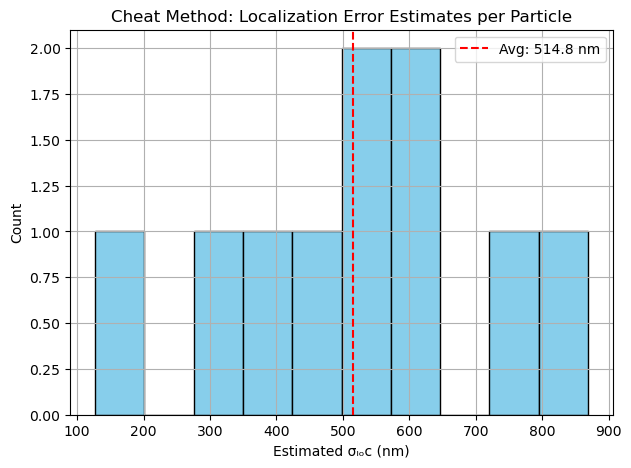

In [12]:
# Multi-Particle Cheat Method
import numpy as np
import matplotlib.pyplot as plt

# Physical constants
k_B = 1.38e-23                 # Boltzmann constant (J/K)
T_Kelvin = T_Celsius + 273.15   # Temperature in Kelvin
eta = 9.2e-4                   # Fluid viscosity (Pa·s)
delta_t = t                    # Frame interval (seconds)

# True particle radius (meters)
r_true = 100e-9  # 100 nm

# Expected diffusion coefficient
D_expected = (k_B * T_Kelvin) / (6 * np.pi * eta * r_true)
var_diffusion = 2 * D_expected * delta_t

# Cheat estimation of σ_loc per particle
num_particles = positions_noisy.shape[1]
sigma_loc_estimates = []

for index in range(num_particles):
    x_measured = positions_noisy[:, index, 0]
    y_measured = positions_noisy[:, index, 1]
    
    dx_measured = np.diff(x_measured)
    dy_measured = np.diff(y_measured)
    
    var_measured = np.mean(dx_measured**2 + dy_measured**2)
    var_localization = (var_measured - var_diffusion)
    
    if var_localization < 0:
        sigma_loc = 0.0
    else:
        sigma_loc = np.sqrt(var_localization / 2)
    
    sigma_loc_estimates.append(sigma_loc)

sigma_loc_estimates = np.array(sigma_loc_estimates)
avg_sigma_loc = np.mean(sigma_loc_estimates)

print(f"Average σ_loc (nm): {avg_sigma_loc * 1e9:.2f}")

# Plot σ_loc estimates
plt.figure(figsize=(7,5))
plt.hist(sigma_loc_estimates*1e9, bins=10, color='skyblue', edgecolor='black')
plt.axvline(avg_sigma_loc*1e9, color='red', linestyle='--', label=f'Avg: {avg_sigma_loc*1e9:.1f} nm')
plt.xlabel('Estimated σₗₒc (nm)')
plt.ylabel('Count')
plt.title('Cheat Method: Localization Error Estimates per Particle')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# 1) Install JAX + jaxlib (match to your Python & OS). 
#    Pick a pair that NumPyro & PyMC support—e.g. 0.4.30:
%pip install --upgrade "jax==0.4.30" "jaxlib==0.4.30"

# 2) Install a compatible NumPyro release:
%pip install --upgrade "numpyro==0.12.1"

# 3) (Re‑)Install PyMC so it picks up the newly installed JAX stack:
%pip install --upgrade pymc


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_phys]


Output()

Sampling 4 chains for 10_000 tune and 20_000 draw iterations (40_000 + 80_000 draws total) took 916 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_phys]


Output()

Sampling 4 chains for 10_000 tune and 20_000 draw iterations (40_000 + 80_000 draws total) took 1392 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_phys]


Output()

Sampling 4 chains for 10_000 tune and 20_000 draw iterations (40_000 + 80_000 draws total) took 11519 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_phys]


Output()

Sampling 4 chains for 10_000 tune and 20_000 draw iterations (40_000 + 80_000 draws total) took 1600 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_phys]


Output()

Sampling 4 chains for 10_000 tune and 20_000 draw iterations (40_000 + 80_000 draws total) took 1645 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_phys]


Output()

Sampling 4 chains for 10_000 tune and 20_000 draw iterations (40_000 + 80_000 draws total) took 1263 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_phys]


Output()

Sampling 4 chains for 10_000 tune and 20_000 draw iterations (40_000 + 80_000 draws total) took 1222 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_phys]


Output()

Sampling 4 chains for 10_000 tune and 20_000 draw iterations (40_000 + 80_000 draws total) took 978 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_phys]


Output()

Sampling 4 chains for 10_000 tune and 20_000 draw iterations (40_000 + 80_000 draws total) took 989 seconds.
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_phys]


Output()

Sampling 4 chains for 10_000 tune and 20_000 draw iterations (40_000 + 80_000 draws total) took 1353 seconds.


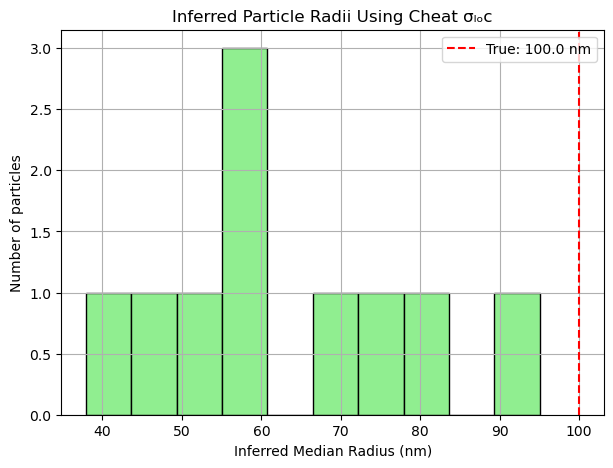

Average inferred radius: 63.77 nm
Std of inferred radii: 16.40 nm


In [17]:
# Per-particle MCMC Inference
import pymc as pm
import arviz as az

# Physical constant for radius conversion
C = (k_B * T_Kelvin * delta_t) / (3 * np.pi * eta)

radii_medians = []

for index in range(num_particles):
    x_measured = positions_noisy[:, index, 0]
    y_measured = positions_noisy[:, index, 1]
    sigma_loc = sigma_loc_estimates[index]
    
    dx = np.diff(x_measured)
    dy = np.diff(y_measured)
    dist_arr = np.sqrt(dx**2 + dy**2)
    
    with pm.Model() as model:
        sigma_phys = pm.HalfCauchy("sigma_phys", beta=5)
        sigma_eff  = pm.Deterministic(
            "sigma_eff", pm.math.sqrt(sigma_phys**2 + sigma_loc**2)
        )
        tau = pm.Deterministic("tau", 1.0 / sigma_phys**2)
        pm.Normal("obs", mu=0, sigma=sigma_eff, observed=dist_arr)
        
        trace = pm.sample(
        draws=20000,
        tune=10000,
        chains=4,
        target_accept=0.9,
        return_inferencedata=True,
        progressbar=True
    )
        
    tau_samples = trace.posterior["tau"].values.flatten()
    r_samples = tau_samples * C
    median_r = np.median(r_samples)
    radii_medians.append(median_r)

radii_medians = np.array(radii_medians)

# Plot inferred radii
plt.figure(figsize=(7,5))
plt.hist(radii_medians*1e9, bins=10, color='lightgreen', edgecolor='black')
plt.axvline(r_true*1e9, color='red', linestyle='--', label=f'True: {r_true*1e9:.1f} nm')
plt.xlabel('Inferred Median Radius (nm)')
plt.ylabel('Number of particles')
plt.title('Inferred Particle Radii Using Cheat σₗₒc')
plt.legend()
plt.grid(True)
plt.show()

# Summary stats
print(f"Average inferred radius: {np.mean(radii_medians)*1e9:.2f} nm")
print(f"Std of inferred radii: {np.std(radii_medians)*1e9:.2f} nm")

In [ ]:
# Extract σₗₒc (localization uncertainty) from noise_features

# already have with_noise and noise_features from earlier

# Frames = with_noise
# Features = noise_features
# Particle uncertainties = extracted from noise_features['ep']

# localization uncertainty ('ep') in pixels
sigma_loc_trackpy_px = noise_tracks['ep'].to_numpy()

# uncertainty from pixels to meters
pixel_size = 3.149e-7  # meters per pixel but try to dynamically get the size from the cheat method per particle estimations
sigma_loc_trackpy_meters = sigma_loc_trackpy_px * pixel_size

# particle IDs
particle_ids = noise_tracks['particle'].to_numpy()

# dictionary: particle_id → sigma_loc
trackpy_sigma_dict = {pid: sigma for pid, sigma in zip(particle_ids, sigma_loc_trackpy_meters)}

print(f"Extracted {len(trackpy_sigma_dict)} uncertainties (meters).")
print(f"Example σₗₒc values: {[round(val*1e9,2) for val in list(trackpy_sigma_dict.values())[:5]]} nm")